In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import math
from sklearn.preprocessing import StandardScaler
from itertools import product

In [2]:

from random_dataset import create_random_dataset
from evolutionary_algorithm import EA
from greedy_algorithm import GreedyAlgorithm

# Peptides

In [3]:
sampled_peptides_data_dir = "./data/sampled/"
peptides_data_dir = "./data/peptides/"

self1_data = pd.read_csv(peptides_data_dir + "self1-6mers.txt", header=None)

self1_data

,0
0,WFIIFF
1,IDVNHY
2,DEMHMS
3,IHGLFC
4,EEMNSY
...,...
261995,LLGRMF
261996,PSLMLL
261997,GMAYPR
261998,DALTEV


## Random Sampling

In [4]:
random_dataset = create_random_dataset(df=self1_data, n=2000, seed=42)

random_dataset

,0
0,SDRIAF
1,LAELLN
2,VCDEFF
3,ASIHVP
4,VNGPYA
...,...
1995,HNDQLY
1996,WGNLAG
1997,LDGSEY
1998,DPAVVE


## Peptide Preperations and Fitness Function

In [5]:
peptides = self1_data[0].tolist()
peptide_length = len(peptides[0])

position_counts = [defaultdict(int) for _ in range(peptide_length)]

# count frequencies per position
for peptide in peptides:
    for i, aa in enumerate(peptide):
        position_counts[i][aa] += 1

# convert counts to frequencies
position_freqs = []
for pos in position_counts:
    total = sum(pos.values())
    pos_freq = {aa: count / total for aa, count in pos.items()}
    position_freqs.append(pos_freq)
    
def compute_Fpep(peptide, position_freqs):
    return sum(position_freqs[i].get(aa, 0) for i, aa in enumerate(peptide))

fpep_scores = [compute_Fpep(p, position_freqs) for p in peptides]

fpep_scores

[0.37046946564885497,
 0.34214503816793895,
 0.31243893129770994,
 0.45534351145038165,
 0.308206106870229,
 0.39288167938931295,
 0.3587213740458015,
 0.3714351145038168,
 0.3233931297709924,
 0.327793893129771,
 0.46122519083969465,
 0.22970610687022902,
 0.36521374045801525,
 0.46572519083969466,
 0.4135954198473282,
 0.27366030534351143,
 0.4122862595419847,
 0.3048435114503817,
 0.6128358778625954,
 0.4230801526717557,
 0.44599236641221374,
 0.38794656488549617,
 0.36055725190839694,
 0.3513320610687023,
 0.3815496183206107,
 0.43906870229007633,
 0.5297709923664122,
 0.31613358778625955,
 0.3573053435114504,
 0.3646030534351145,
 0.5421106870229008,
 0.22180534351145037,
 0.5223931297709924,
 0.448469465648855,
 0.5231259541984733,
 0.4818015267175572,
 0.2848206106870229,
 0.4250381679389313,
 0.26506106870229007,
 0.49401908396946564,
 0.40106870229007635,
 0.3785419847328244,
 0.34080534351145036,
 0.4888740458015267,
 0.3559465648854962,
 0.514618320610687,
 0.269309160305343

## Greedy Algorithm

In [6]:
amino_acids = "ACDEFGHIKLMNPQRSTVWY"

motifs = [''.join(motif) for motif in product(amino_acids, repeat=6)]

print(f"Total number of motifs: {len(motifs)}")

Total number of motifs: 64000000


In [11]:
# greedy_optimizer = GreedyAlgorithm(
#     peptides=self1_data[0].tolist(),
#     motifs=motifs,
#     t=3,
#     seed=42
# )

# for now, let's limit the lists due to computational constraints
greedy_optimizer = GreedyAlgorithm(
    peptides=self1_data[0].tolist()[0:200],
    motifs=motifs[0:20000],
    t=3,
    seed=42
)
self1_optimized_data = greedy_optimizer.run()
self1_optimized_data

['WAAVGP',
 'KAATWK',
 'DAANAR',
 'AWDLGA',
 'NSAINP',
 'AECLQT',
 'LFDAYM',
 'MNCELL',
 'IDDEYK',
 'KDCIVH',
 'VEADIG',
 'ARALAL',
 'LGAIAG',
 'LQAGTT',
 'QDASDV',
 'TSCSVF',
 'LRALGF',
 'WFIIFF',
 'DEMHMS',
 'IHGLFC',
 'SSICIV',
 'MREAVT',
 'DNIKSA',
 'MQMDRF',
 'WSECKE',
 'LAYLYE',
 'FAKALG',
 'HKILTE',
 'QKFLLG',
 'VEYDYD',
 'NTFIIG',
 'HLFLLT',
 'AAFFAL',
 'YNRDFI',
 'LESDEF',
 'IHHFVA',
 'MSGLDY',
 'SAFADI',
 'PGFLSG',
 'EEGLFR',
 'SSIEVI',
 'QEYIIT',
 'EKFFLV',
 'LLGLSF',
 'MNSEQR',
 'RSVFSS',
 'AEVCAV',
 'MTLLLF',
 'LSGGSM',
 'DGQGYL',
 'LLVCGF',
 'LMKFWM',
 'IEELKT',
 'SPGLYR',
 'GKTEEE',
 'IENEDV',
 'PDSLSQ',
 'SNYLTN',
 'EDIAVF',
 'GLLFEL',
 'FYLFAS',
 'VELKVW',
 'MAVFGS',
 'MVLHAE',
 'FCLDYI',
 'AFVIFS',
 'TEVLTL',
 'VPSLEG',
 'MGTLLR',
 'LSILHM',
 'LHYDPV',
 'MPVHLL',
 'ISEAQA',
 'CKLFTG',
 'YEEEIR',
 'MAGLIL',
 'PPSASG',
 'QVFLSE',
 'EPEFVN',
 'LVPLLL',
 'LANARL',
 'ADEFGV',
 'QNSLSS',
 'MEIEIP',
 'QEVIDF',
 'LLLLLM',
 'NSLAIG',
 'LEVLLA',
 'LLRLFT',
 'SMWIFA',
 'LQQAVP',

In [9]:
print(f"Size of greedily optimized data set: {len(self1_optimized_data)}")

Size of greedily optimized data set: 197


In [10]:
with open(sampled_peptides_data_dir + "self1_6mers_greedy.txt", "w") as f:
    for item in self1_optimized_data:
        f.write(f"{item}\n")

## Evolutionary Algorithm

In [47]:
def fitness(fpep_scores_set):
    if len(fpep_scores_set) == 0:
        return np.inf
    
    # Minimize avg fpep
    avg_fpep = np.mean(fpep_scores_set)
    
    # Maximize different kinds of fpep
    different_fpep = np.var(fpep_scores_set)
    
    # 1 & 0    is the same as what we had before
    weight_avg = 1
    weight_different = -3.0

    return (weight_avg * avg_fpep) + (weight_different * different_fpep)
    
    

In [48]:
## Standard Values across both Algorithms

sigma_val = 30


In [27]:
ea = EA(
    data=fpep_scores,
    N=100,
    sigma=sigma_val,
    K=2,
    p=0.1,
    mu=0.01,
    T=1000,
    f=np.mean,
    seed=42
)
best_individual, best_fitness, fitness_avg, fitness_best = ea.run()

m_ea = EA(
    data=fpep_scores,
    N=100,
    sigma=sigma_val,
    K=2,
    p=0.1,
    mu=0.01,
    T=1000,
    f=fitness,
    seed=42
)
multi_best_individual, multi_best_fitness, multi_fitness_avg, multi_fitness_best = m_ea.run()

Gen 1: Best = 0.4173809523809524, Avg = 0.45159285714285713
Gen 2: Best = 0.41238095238095235, Avg = 0.44056666666666666
Gen 3: Best = 0.40833333333333327, Avg = 0.4346571428571429
Gen 4: Best = 0.40666666666666657, Avg = 0.43073333333333336
Gen 5: Best = 0.4023809523809524, Avg = 0.42718333333333325
Gen 6: Best = 0.3985714285714286, Avg = 0.42259523809523797
Gen 7: Best = 0.3983333333333334, Avg = 0.419302380952381
Gen 8: Best = 0.4007142857142857, Avg = 0.4166095238095238
Gen 9: Best = 0.39595238095238094, Avg = 0.4141785714285713
Gen 10: Best = 0.3971428571428571, Avg = 0.41122142857142857
Gen 11: Best = 0.392142857142857, Avg = 0.40886190476190476
Gen 12: Best = 0.38928571428571423, Avg = 0.40722857142857144
Gen 13: Best = 0.3861904761904762, Avg = 0.4042452380952382
Gen 14: Best = 0.38285714285714284, Avg = 0.4030285714285714
Gen 15: Best = 0.3845238095238095, Avg = 0.40162619047619047
Gen 16: Best = 0.3840476190476191, Avg = 0.3996714285714285
Gen 17: Best = 0.38119047619047625, 

Gen 139: Best = 0.35928571428571426, Avg = 0.3764261904761905
Gen 140: Best = 0.3614285714285714, Avg = 0.3765738095238095
Gen 141: Best = 0.36190476190476184, Avg = 0.37683571428571416
Gen 142: Best = 0.3611904761904762, Avg = 0.3774904761904762
Gen 143: Best = 0.3623809523809524, Avg = 0.378047619047619
Gen 144: Best = 0.3619047619047619, Avg = 0.377497619047619
Gen 145: Best = 0.3645238095238096, Avg = 0.3779166666666666
Gen 146: Best = 0.36190476190476184, Avg = 0.3773404761904762
Gen 147: Best = 0.36404761904761895, Avg = 0.37736666666666663
Gen 148: Best = 0.3633333333333333, Avg = 0.3777095238095239
Gen 149: Best = 0.36190476190476184, Avg = 0.3777095238095239
Gen 150: Best = 0.359047619047619, Avg = 0.3777833333333334
Gen 151: Best = 0.3614285714285714, Avg = 0.37818571428571424
Gen 152: Best = 0.3611904761904762, Avg = 0.3778357142857142
Gen 153: Best = 0.35904761904761895, Avg = 0.3778309523809524
Gen 154: Best = 0.3595238095238094, Avg = 0.37780476190476187
Gen 155: Best = 0

Gen 278: Best = 0.3597619047619048, Avg = 0.37808333333333344
Gen 279: Best = 0.3640476190476191, Avg = 0.379652380952381
Gen 280: Best = 0.36000000000000004, Avg = 0.37944761904761903
Gen 281: Best = 0.36357142857142866, Avg = 0.37829285714285715
Gen 282: Best = 0.36380952380952386, Avg = 0.37675238095238095
Gen 283: Best = 0.3630952380952381, Avg = 0.3758428571428572
Gen 284: Best = 0.3630952380952381, Avg = 0.37623809523809526
Gen 285: Best = 0.3657142857142857, Avg = 0.3766642857142859
Gen 286: Best = 0.35833333333333334, Avg = 0.37647857142857144
Gen 287: Best = 0.3578571428571429, Avg = 0.37674285714285716
Gen 288: Best = 0.35428571428571426, Avg = 0.377007142857143
Gen 289: Best = 0.35619047619047617, Avg = 0.3762857142857143
Gen 290: Best = 0.35523809523809524, Avg = 0.37392380952380955
Gen 291: Best = 0.3554761904761905, Avg = 0.37315714285714285
Gen 292: Best = 0.35333333333333333, Avg = 0.3712261904761905
Gen 293: Best = 0.35523809523809524, Avg = 0.37135238095238093
Gen 294

Gen 422: Best = 0.3659523809523809, Avg = 0.3799380952380952
Gen 423: Best = 0.3676190476190476, Avg = 0.37946428571428553
Gen 424: Best = 0.3673809523809523, Avg = 0.37931666666666664
Gen 425: Best = 0.3695238095238095, Avg = 0.3812380952380952
Gen 426: Best = 0.36499999999999994, Avg = 0.3812333333333334
Gen 427: Best = 0.36738095238095236, Avg = 0.38147142857142863
Gen 428: Best = 0.364047619047619, Avg = 0.38040952380952375
Gen 429: Best = 0.363095238095238, Avg = 0.38048333333333323
Gen 430: Best = 0.365952380952381, Avg = 0.3812690476190477
Gen 431: Best = 0.3647619047619048, Avg = 0.38108333333333333
Gen 432: Best = 0.36523809523809525, Avg = 0.3804595238095238
Gen 433: Best = 0.3685714285714285, Avg = 0.38014523809523804
Gen 434: Best = 0.36238095238095236, Avg = 0.37795238095238093
Gen 435: Best = 0.3633333333333333, Avg = 0.3774095238095238
Gen 436: Best = 0.3666666666666666, Avg = 0.3776119047619047
Gen 437: Best = 0.3669047619047619, Avg = 0.37798809523809523
Gen 438: Best 

Gen 575: Best = 0.3595238095238095, Avg = 0.37829285714285715
Gen 576: Best = 0.35785714285714293, Avg = 0.37658095238095235
Gen 577: Best = 0.3566666666666667, Avg = 0.3759357142857143
Gen 578: Best = 0.35309523809523813, Avg = 0.37539761904761904
Gen 579: Best = 0.3507142857142857, Avg = 0.374952380952381
Gen 580: Best = 0.35, Avg = 0.3741380952380952
Gen 581: Best = 0.35261904761904767, Avg = 0.3736904761904762
Gen 582: Best = 0.3547619047619047, Avg = 0.3734214285714285
Gen 583: Best = 0.3535714285714286, Avg = 0.3737880952380952
Gen 584: Best = 0.3511904761904762, Avg = 0.372695238095238
Gen 585: Best = 0.3545238095238095, Avg = 0.3730928571428571
Gen 586: Best = 0.35333333333333333, Avg = 0.37318095238095245
Gen 587: Best = 0.35500000000000004, Avg = 0.37134999999999996
Gen 588: Best = 0.35428571428571426, Avg = 0.37067142857142854
Gen 589: Best = 0.35500000000000004, Avg = 0.36982619047619053
Gen 590: Best = 0.3564285714285715, Avg = 0.3708071428571429
Gen 591: Best = 0.35928571

Gen 714: Best = 0.3611904761904762, Avg = 0.3734119047619046
Gen 715: Best = 0.3595238095238095, Avg = 0.37283095238095243
Gen 716: Best = 0.35928571428571426, Avg = 0.37293571428571426
Gen 717: Best = 0.35714285714285715, Avg = 0.3728190476190476
Gen 718: Best = 0.3576190476190476, Avg = 0.37360952380952384
Gen 719: Best = 0.35785714285714293, Avg = 0.37372619047619055
Gen 720: Best = 0.35928571428571426, Avg = 0.3739309523809525
Gen 721: Best = 0.3585714285714286, Avg = 0.3744166666666667
Gen 722: Best = 0.35904761904761906, Avg = 0.37521904761904773
Gen 723: Best = 0.3604761904761905, Avg = 0.37578333333333336
Gen 724: Best = 0.35904761904761906, Avg = 0.376295238095238
Gen 725: Best = 0.35904761904761906, Avg = 0.3753523809523809
Gen 726: Best = 0.35523809523809535, Avg = 0.37489047619047616
Gen 727: Best = 0.3602380952380953, Avg = 0.37464761904761906
Gen 728: Best = 0.35952380952380963, Avg = 0.37533095238095243
Gen 729: Best = 0.36023809523809525, Avg = 0.3754976190476191
Gen 73

Gen 852: Best = 0.36166666666666675, Avg = 0.38034999999999997
Gen 853: Best = 0.36357142857142866, Avg = 0.3815000000000001
Gen 854: Best = 0.3640476190476191, Avg = 0.3798523809523809
Gen 855: Best = 0.36166666666666675, Avg = 0.3795523809523809
Gen 856: Best = 0.360952380952381, Avg = 0.37885000000000013
Gen 857: Best = 0.35714285714285715, Avg = 0.3793928571428571
Gen 858: Best = 0.36047619047619056, Avg = 0.37858333333333344
Gen 859: Best = 0.3614285714285715, Avg = 0.3779071428571428
Gen 860: Best = 0.3638095238095238, Avg = 0.37779285714285715
Gen 861: Best = 0.35976190476190484, Avg = 0.37936190476190484
Gen 862: Best = 0.3628571428571429, Avg = 0.3798357142857144
Gen 863: Best = 0.3673809523809524, Avg = 0.37977142857142865
Gen 864: Best = 0.36595238095238103, Avg = 0.37955952380952385
Gen 865: Best = 0.3600000000000001, Avg = 0.3804809523809524
Gen 866: Best = 0.3692857142857144, Avg = 0.37955
Gen 867: Best = 0.36690476190476196, Avg = 0.3802595238095238
Gen 868: Best = 0.368

Gen 988: Best = 0.3657142857142857, Avg = 0.3787261904761905
Gen 989: Best = 0.36095238095238097, Avg = 0.3785095238095238
Gen 990: Best = 0.3678571428571429, Avg = 0.3788000000000001
Gen 991: Best = 0.3661904761904762, Avg = 0.3788214285714286
Gen 992: Best = 0.3661904761904762, Avg = 0.3786904761904762
Gen 993: Best = 0.36428571428571443, Avg = 0.37955714285714287
Gen 994: Best = 0.36690476190476196, Avg = 0.3800761904761905
Gen 995: Best = 0.36523809523809525, Avg = 0.37978571428571434
Gen 996: Best = 0.3685714285714286, Avg = 0.38143809523809524
Gen 997: Best = 0.36833333333333335, Avg = 0.38105000000000006
Gen 998: Best = 0.3678571428571429, Avg = 0.3805333333333334
Gen 999: Best = 0.3702380952380952, Avg = 0.38189761904761904
Gen 1000: Best = 0.3707142857142857, Avg = 0.3830380952380952
Gen 1: Best = 0.38890391156462584, Avg = 0.4254670391156462
Gen 2: Best = 0.3877755102040817, Avg = 0.4144345918367347
Gen 3: Best = 0.38460799319727884, Avg = 0.4083331836734695
Gen 4: Best = 0.3

Gen 152: Best = 0.3420494897959183, Avg = 0.3555379795918367
Gen 153: Best = 0.3453469387755103, Avg = 0.3563082227891157
Gen 154: Best = 0.34409591836734693, Avg = 0.3557351479591837
Gen 155: Best = 0.3450127551020408, Avg = 0.3559702074829933
Gen 156: Best = 0.3460265306122449, Avg = 0.3556967006802721
Gen 157: Best = 0.34538367346938775, Avg = 0.35528684693877544
Gen 158: Best = 0.34407142857142853, Avg = 0.35587663605442166
Gen 159: Best = 0.3413612244897959, Avg = 0.35669924319727886
Gen 160: Best = 0.34299846938775513, Avg = 0.3564554506802722
Gen 161: Best = 0.34560816326530613, Avg = 0.3564474744897959
Gen 162: Best = 0.34660051020408167, Avg = 0.35658888605442174
Gen 163: Best = 0.34517959183673463, Avg = 0.35666123129251703
Gen 164: Best = 0.3445596938775511, Avg = 0.35564000850340144
Gen 165: Best = 0.3445596938775511, Avg = 0.35530944047619045
Gen 166: Best = 0.34289438775510206, Avg = 0.3553819438775511
Gen 167: Best = 0.34276530612244893, Avg = 0.3556053163265306
Gen 168:

Gen 296: Best = 0.3450877551020408, Avg = 0.35453997108843543
Gen 297: Best = 0.34496785714285705, Avg = 0.3548504846938776
Gen 298: Best = 0.3434916666666666, Avg = 0.3543446955782313
Gen 299: Best = 0.34386581632653057, Avg = 0.3539384489795918
Gen 300: Best = 0.3437551020408163, Avg = 0.35284726700680275
Gen 301: Best = 0.34246326530612253, Avg = 0.35252950000000005
Gen 302: Best = 0.34320816326530607, Avg = 0.3528499353741496
Gen 303: Best = 0.34335714285714275, Avg = 0.35329252721088444
Gen 304: Best = 0.3423326530612244, Avg = 0.3526619948979592
Gen 305: Best = 0.33862908163265304, Avg = 0.3523658588435374
Gen 306: Best = 0.3422753401360543, Avg = 0.35284068197278906
Gen 307: Best = 0.3414326530612244, Avg = 0.3526921037414965
Gen 308: Best = 0.3439448979591837, Avg = 0.3534633588435374
Gen 309: Best = 0.3450882653061225, Avg = 0.3532280068027211
Gen 310: Best = 0.34324421768707486, Avg = 0.35334113775510206
Gen 311: Best = 0.34344744897959184, Avg = 0.3536299251700681
Gen 312: B

Gen 435: Best = 0.34758350340136057, Avg = 0.35717178911564623
Gen 436: Best = 0.34819319727891157, Avg = 0.3566210544217688
Gen 437: Best = 0.34808826530612247, Avg = 0.3560327040816326
Gen 438: Best = 0.3463671768707483, Avg = 0.35598985204081635
Gen 439: Best = 0.3434651360544218, Avg = 0.35588554081632645
Gen 440: Best = 0.3435891156462585, Avg = 0.3570854336734694
Gen 441: Best = 0.3434755102040816, Avg = 0.3556469523809524
Gen 442: Best = 0.34239523809523814, Avg = 0.35530921428571427
Gen 443: Best = 0.34415034013605444, Avg = 0.3541227636054422
Gen 444: Best = 0.34461887755102044, Avg = 0.35487477721088434
Gen 445: Best = 0.34581615646258507, Avg = 0.3551083316326531
Gen 446: Best = 0.3455916666666667, Avg = 0.35533189795918374
Gen 447: Best = 0.3457183673469388, Avg = 0.35472065986394563
Gen 448: Best = 0.34668095238095237, Avg = 0.35561779931972787
Gen 449: Best = 0.3436596938775511, Avg = 0.35458289795918363
Gen 450: Best = 0.3436596938775511, Avg = 0.35458800170068033
Gen 45

Gen 582: Best = 0.34424336734693883, Avg = 0.3538618265306122
Gen 583: Best = 0.34519999999999995, Avg = 0.353969156462585
Gen 584: Best = 0.34477551020408154, Avg = 0.3541621904761905
Gen 585: Best = 0.3479181972789115, Avg = 0.35548076020408154
Gen 586: Best = 0.3461590136054422, Avg = 0.35544285204081627
Gen 587: Best = 0.3454413265306122, Avg = 0.35631038435374146
Gen 588: Best = 0.3446591836734693, Avg = 0.35511031972789114
Gen 589: Best = 0.34444285714285716, Avg = 0.35596086054421766
Gen 590: Best = 0.34531360544217693, Avg = 0.3570629778911564
Gen 591: Best = 0.3458181972789116, Avg = 0.35685268367346934
Gen 592: Best = 0.3451625850340136, Avg = 0.3563388605442177
Gen 593: Best = 0.3450875850340136, Avg = 0.356405768707483
Gen 594: Best = 0.34298367346938774, Avg = 0.3558415884353741
Gen 595: Best = 0.3442773809523809, Avg = 0.3548245476190475
Gen 596: Best = 0.3432993197278911, Avg = 0.354588399659864
Gen 597: Best = 0.3440066326530612, Avg = 0.3549377108843537
Gen 598: Best =

Gen 731: Best = 0.3487161564625851, Avg = 0.35932545408163263
Gen 732: Best = 0.3445698979591837, Avg = 0.3606491530612245
Gen 733: Best = 0.34502023809523813, Avg = 0.36071899489795917
Gen 734: Best = 0.34696513605442175, Avg = 0.35931891666666665
Gen 735: Best = 0.34549846938775514, Avg = 0.35887701190476196
Gen 736: Best = 0.3465551020408164, Avg = 0.35840821258503397
Gen 737: Best = 0.3459020408163266, Avg = 0.358423355442177
Gen 738: Best = 0.345965306122449, Avg = 0.3573766343537415
Gen 739: Best = 0.34537687074829937, Avg = 0.3577942704081633
Gen 740: Best = 0.3460040816326531, Avg = 0.357066724489796
Gen 741: Best = 0.34373877551020415, Avg = 0.3563625833333334
Gen 742: Best = 0.34484285714285723, Avg = 0.35537669217687085
Gen 743: Best = 0.3445755102040817, Avg = 0.3557480017006803
Gen 744: Best = 0.3416809523809524, Avg = 0.35638939115646273
Gen 745: Best = 0.3436183673469388, Avg = 0.35563923469387754
Gen 746: Best = 0.34024217687074837, Avg = 0.35580732142857147
Gen 747: Be

Gen 884: Best = 0.348456462585034, Avg = 0.35685469387755103
Gen 885: Best = 0.3485168367346939, Avg = 0.3568881717687075
Gen 886: Best = 0.3464448979591837, Avg = 0.3571223588435374
Gen 887: Best = 0.3434081632653062, Avg = 0.35575080782312923
Gen 888: Best = 0.34763112244897965, Avg = 0.35652104761904757
Gen 889: Best = 0.3470857142857143, Avg = 0.35685177721088435
Gen 890: Best = 0.34709030612244895, Avg = 0.35634564795918366
Gen 891: Best = 0.3454984693877552, Avg = 0.35760475850340134
Gen 892: Best = 0.3467816326530612, Avg = 0.3570607823129252
Gen 893: Best = 0.346607993197279, Avg = 0.3561712568027211
Gen 894: Best = 0.3482544217687075, Avg = 0.3577083758503402
Gen 895: Best = 0.34578299319727895, Avg = 0.35712777040816335
Gen 896: Best = 0.3452646258503402, Avg = 0.35762251360544217
Gen 897: Best = 0.3455673469387755, Avg = 0.35752021428571423
Gen 898: Best = 0.3467059523809524, Avg = 0.3563147619047619
Gen 899: Best = 0.34737346938775515, Avg = 0.3568335459183674
Gen 900: Best

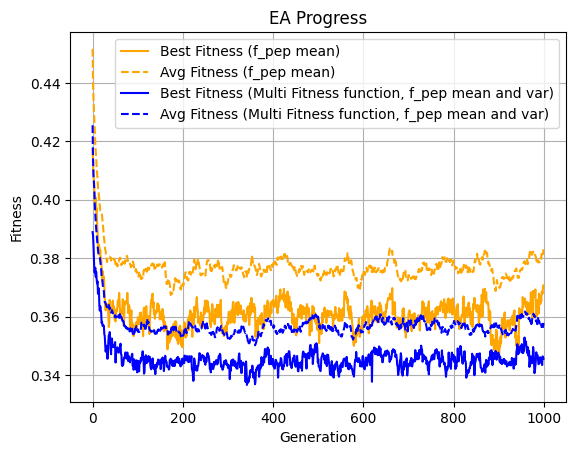

In [28]:
plt.plot(fitness_best, label='Best Fitness (f_pep mean)', linestyle='-', color='orange')
plt.plot(fitness_avg, label='Avg Fitness (f_pep mean)', linestyle='--', color='orange')
plt.plot(multi_fitness_best, label='Best Fitness (Multi Fitness function, f_pep mean and var)', linestyle='-', color='blue')
plt.plot(multi_fitness_avg, label='Avg Fitness (Multi Fitness function, f_pep mean and var)', linestyle='--', color='blue')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("EA Progress")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
optimal_peptides = [peptides[i] for i in best_individual]
optimal_peptides

['SDSACG',
 'WLNDNL',
 'WKVNPE',
 'SDVPVA',
 'GSDGYK',
 'WTSISC',
 'MHNQDG',
 'YHRYNL',
 'PKHIYR',
 'TYPKIG',
 'QAIMTS',
 'MFFWYD',
 'IFETYC',
 'ICGLRQ',
 'KPDETF',
 'MRTNFL',
 'SLIRSN',
 'QDSEVK',
 'ALAVPQ',
 'DWYQAS',
 'HQGMHM',
 'FNWMHY',
 'TTQIHN',
 'LWEFYH',
 'SDTEGM',
 'DAAPPV',
 'REAIEL',
 'TFVKEW',
 'EQENFS',
 'DHCDNI']

In [30]:
multi_optimal_peptides = [peptides[i] for i in multi_best_individual]
multi_optimal_peptides

['SDTEGM',
 'TTQIHN',
 'LASLAT',
 'FFWYDL',
 'HQGMHM',
 'WKVNPE',
 'KAVVLK',
 'SDSACG',
 'QAIMTS',
 'SHLTQY',
 'MHNQDG',
 'MRTNFL',
 'LDQCDL',
 'FLESGA',
 'QDSEVK',
 'MKDEPV',
 'GSDGYK',
 'LIQKYQ',
 'MTGRIP',
 'KPDETF',
 'PKHIYR',
 'YHRYNL',
 'DHCDNI',
 'TYPKIG',
 'FNWMHY',
 'WTSISC',
 'FQRTFS',
 'LWEFYH',
 'YSFGAF',
 'VLPFFT']

# Improved Evolutionary Algorithm

Gen 1: Best = -0.5373808412346341, Avg = -0.006100002328366456
Gen 2: Best = -0.602828541229367, Avg = -0.1668521517276658
Gen 3: Best = -0.6098902030684895, Avg = -0.25301209976841804
Gen 4: Best = -0.6441239950425323, Avg = -0.31454109782566625
Gen 5: Best = -0.7145322204141475, Avg = -0.37591265563198595
Gen 6: Best = -0.7516780245919858, Avg = -0.44728798656424956
Gen 7: Best = -0.7796855044931619, Avg = -0.49336721359529867
Gen 8: Best = -0.8052385083162226, Avg = -0.5210998684998427
Gen 9: Best = -0.848180187637199, Avg = -0.5271287688220359
Gen 10: Best = -0.8895829881656716, Avg = -0.5570569271962011
Gen 11: Best = -0.9405290258073333, Avg = -0.5917881036405089
Gen 12: Best = -0.8749192556711396, Avg = -0.6245093665020085
Gen 13: Best = -0.885753803573514, Avg = -0.66155447515259
Gen 14: Best = -0.9774861856820088, Avg = -0.7035892232245402
Gen 15: Best = -0.9644936777542388, Avg = -0.7052644654176126
Gen 16: Best = -1.0756585232254836, Avg = -0.7419623982700717
Gen 17: Best = 

Gen 136: Best = -1.5288637223159356, Avg = -1.2275211560907882
Gen 137: Best = -1.5586768726951323, Avg = -1.2363518043654573
Gen 138: Best = -1.5451173817893733, Avg = -1.2362557407545838
Gen 139: Best = -1.5788123400498804, Avg = -1.2312327903235643
Gen 140: Best = -1.5062201055254185, Avg = -1.2251908351342318
Gen 141: Best = -1.5201292608073, Avg = -1.2112738893399768
Gen 142: Best = -1.5041173939604275, Avg = -1.2270079418038278
Gen 143: Best = -1.420501442196178, Avg = -1.2301747279965336
Gen 144: Best = -1.4474573037977334, Avg = -1.2252547662094575
Gen 145: Best = -1.4271326671055722, Avg = -1.2291029553367596
Gen 146: Best = -1.4228204222945338, Avg = -1.2358993900080857
Gen 147: Best = -1.4499909773267028, Avg = -1.233430203263438
Gen 148: Best = -1.4547633834346734, Avg = -1.2398606292083807
Gen 149: Best = -1.4307711072575655, Avg = -1.2347044303156252
Gen 150: Best = -1.502339347712609, Avg = -1.2371242827984634
Gen 151: Best = -1.5134172633443004, Avg = -1.236324247191066

Gen 270: Best = -1.4091806838694199, Avg = -1.1515068004252722
Gen 271: Best = -1.4557868524698412, Avg = -1.15073328325166
Gen 272: Best = -1.3655662499578989, Avg = -1.1472969541939662
Gen 273: Best = -1.4255151158964634, Avg = -1.1508589302133527
Gen 274: Best = -1.4361896937943783, Avg = -1.1443207985039623
Gen 275: Best = -1.4042201584925373, Avg = -1.1538902402290276
Gen 276: Best = -1.3887205511974992, Avg = -1.128632447149254
Gen 277: Best = -1.3753236554674524, Avg = -1.1293293891058576
Gen 278: Best = -1.3575337423727611, Avg = -1.1447790151483173
Gen 279: Best = -1.3403358113150092, Avg = -1.1512623875063654
Gen 280: Best = -1.3448085511647578, Avg = -1.1422577999732924
Gen 281: Best = -1.3211430404418234, Avg = -1.1323945658402794
Gen 282: Best = -1.4045708729371613, Avg = -1.1361484170649727
Gen 283: Best = -1.39753526022549, Avg = -1.1324762458759283
Gen 284: Best = -1.4360276236529175, Avg = -1.14412447514426
Gen 285: Best = -1.4088831177481995, Avg = -1.1461264899833532

Gen 423: Best = -1.432119241609906, Avg = -1.1733189174363154
Gen 424: Best = -1.4113094445618621, Avg = -1.1912570893845755
Gen 425: Best = -1.330766000040118, Avg = -1.1638430216393503
Gen 426: Best = -1.4117414565943416, Avg = -1.1650548490619033
Gen 427: Best = -1.4524986017282213, Avg = -1.1703669147572555
Gen 428: Best = -1.4414733093856826, Avg = -1.1837153994585647
Gen 429: Best = -1.4486975664005166, Avg = -1.2000846065136077
Gen 430: Best = -1.4455437615701554, Avg = -1.2061711473421908
Gen 431: Best = -1.4734965180451773, Avg = -1.1896214624951678
Gen 432: Best = -1.4729034859397374, Avg = -1.1988769259500769
Gen 433: Best = -1.4202320253394098, Avg = -1.1906270311371894
Gen 434: Best = -1.4652211677649731, Avg = -1.2215499415022162
Gen 435: Best = -1.4190193869668288, Avg = -1.2192202223091968
Gen 436: Best = -1.4116335848447843, Avg = -1.2126389996537512
Gen 437: Best = -1.5012616802855372, Avg = -1.232003445317649
Gen 438: Best = -1.4905063298340169, Avg = -1.241305893362

Gen 559: Best = -1.4102323021690406, Avg = -1.1642863850307155
Gen 560: Best = -1.4321197666441563, Avg = -1.1909615753200646
Gen 561: Best = -1.442551501847005, Avg = -1.187451159251931
Gen 562: Best = -1.4552751179522574, Avg = -1.183876107364035
Gen 563: Best = -1.412441835415088, Avg = -1.189568026601568
Gen 564: Best = -1.4207974332146476, Avg = -1.1977735679889172
Gen 565: Best = -1.4530363853732566, Avg = -1.1959394570803237
Gen 566: Best = -1.4647089082131384, Avg = -1.1952911708927056
Gen 567: Best = -1.457700394697419, Avg = -1.1944581425206993
Gen 568: Best = -1.4119019516330515, Avg = -1.2022025105780005
Gen 569: Best = -1.483874054856122, Avg = -1.198043932304618
Gen 570: Best = -1.4776743169449569, Avg = -1.1964791562731634
Gen 571: Best = -1.468805934559313, Avg = -1.2052962674763918
Gen 572: Best = -1.4256495618077225, Avg = -1.219406287951327
Gen 573: Best = -1.4032769369767246, Avg = -1.2194538965048718
Gen 574: Best = -1.4602351182948896, Avg = -1.2256624563928231
Ge

Gen 709: Best = -1.4237631187760962, Avg = -1.2227613780021418
Gen 710: Best = -1.3934111346833635, Avg = -1.2308226737390986
Gen 711: Best = -1.3847053474734312, Avg = -1.2208096816361884
Gen 712: Best = -1.4159203055626215, Avg = -1.1971199322424113
Gen 713: Best = -1.4680518823809128, Avg = -1.2037309147344708
Gen 714: Best = -1.4744944629871444, Avg = -1.208882461536683
Gen 715: Best = -1.4375112539850174, Avg = -1.203993371831622
Gen 716: Best = -1.408506879210375, Avg = -1.1946486405661971
Gen 717: Best = -1.4048137156322276, Avg = -1.2142976523848839
Gen 718: Best = -1.4423633825780926, Avg = -1.1926384907179766
Gen 719: Best = -1.4227667489368803, Avg = -1.1845057391350373
Gen 720: Best = -1.5057896685956902, Avg = -1.1959672610208123
Gen 721: Best = -1.4664348562060547, Avg = -1.2035078932306977
Gen 722: Best = -1.4755997546444184, Avg = -1.1975041479076574
Gen 723: Best = -1.4449241553030143, Avg = -1.1923186188791635
Gen 724: Best = -1.5210469582299124, Avg = -1.185623683408

Gen 844: Best = -1.3773450694445875, Avg = -1.147103214745639
Gen 845: Best = -1.359392561174185, Avg = -1.1426692210399814
Gen 846: Best = -1.3621972266626738, Avg = -1.1613592150540653
Gen 847: Best = -1.3204421365868269, Avg = -1.1536685433816383
Gen 848: Best = -1.3511979834475862, Avg = -1.156682782929714
Gen 849: Best = -1.3705809737266854, Avg = -1.178198095946409
Gen 850: Best = -1.3263448334110215, Avg = -1.1608697156023384
Gen 851: Best = -1.3260222682308507, Avg = -1.1544360535049092
Gen 852: Best = -1.3571554036979354, Avg = -1.1605134803633756
Gen 853: Best = -1.3204702858512793, Avg = -1.1525777128560852
Gen 854: Best = -1.414895786458953, Avg = -1.1656103623204106
Gen 855: Best = -1.3725752885078688, Avg = -1.1647715138845427
Gen 856: Best = -1.3905006975823193, Avg = -1.14748907413952
Gen 857: Best = -1.4123615878957332, Avg = -1.1368242257004353
Gen 858: Best = -1.4123876370231843, Avg = -1.1466614236039647
Gen 859: Best = -1.4253801449509542, Avg = -1.1471017200524445

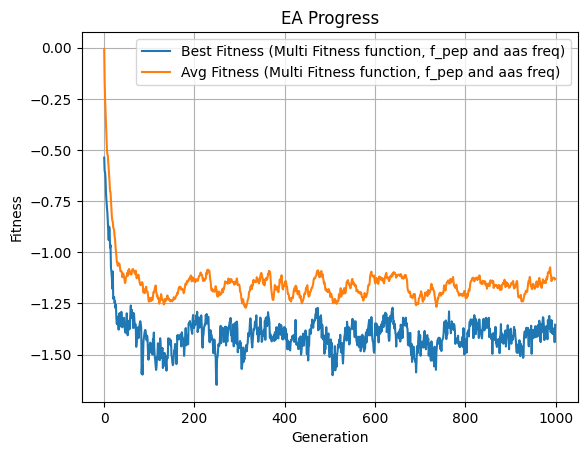

['PLNTQG',
 'FFWYDL',
 'AFVSYY',
 'DFKIVP',
 'QDSEVK',
 'LIQKYQ',
 'KAVVLK',
 'EQENFS',
 'FNWMHY',
 'MKDEPV',
 'MHNQDG',
 'IFETYC',
 'MFFWYD',
 'WLNDNL',
 'DWYQAS',
 'SDTEGM',
 'FHTFFS',
 'YEAVYK',
 'HQGMHM',
 'WTSISC',
 'VLSVFP',
 'DAAPPV',
 'TYPKIG',
 'FCICKF',
 'WKVNPE',
 'YHRYNL',
 'NEENRF',
 'MRTNFL',
 'PKHIYR',
 'MTGRIP']

In [31]:
peptides = self1_data[0].tolist()
peptide_length = len(peptides[0])

position_counts = [defaultdict(int) for _ in range(peptide_length)]

# count frequencies per position
for peptide in peptides:
    for i, aa in enumerate(peptide):
        position_counts[i][aa] += 1

# convert counts to frequencies
position_freqs = []
for pos in position_counts:
    total = sum(pos.values())
    pos_freq = {aa: count / total for aa, count in pos.items()}
    position_freqs.append(pos_freq)
    
def compute_Fpep(peptide):
    return sum(position_freqs[i].get(aa, 0) for i, aa in enumerate(peptide))

def compute_aa_frequency_scores(peptides):
    aa_counts = defaultdict(int)
    total_aa = 0

    for p in peptides:
        for aa in p:
            aa_counts[aa] += 1
            total_aa += 1

    aa_freqs = {aa: count / total_aa for aa, count in aa_counts.items()}

    def score(peptide):
        return sum(aa_freqs[aa] for aa in peptide)

    return [score(p) for p in peptides]

aa_freq_scores = compute_aa_frequency_scores(peptides)

feature_vectors = []
for i, peptide in enumerate(peptides):
    fpep = compute_Fpep(peptide)
    aa = aa_freq_scores[i]
    feature_vectors.append([fpep, aa])
    
scaler = StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

def composite_fitness(subset: np.ndarray):
    fpep_mean = np.mean(subset[:, 0])
    aa_mean = np.mean(subset[:, 1])

    return (
        1 * fpep_mean
        + 0.5 * aa_mean
    )
    
m_ea = EA(
    data=feature_vectors,
    N=100,
    sigma=30,
    K=2,
    p=0.1,
    mu=0.02,
    T=1000,
    f=composite_fitness,
    seed=42
)
multi_best_individual, multi_best_fitness, multi_fitness_avg, multi_fitness_best = m_ea.run()

plt.plot(multi_fitness_best, label='Best Fitness (Multi Fitness function, f_pep and aas freq)')
plt.plot(multi_fitness_avg, label='Avg Fitness (Multi Fitness function, f_pep and aas freq)')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("EA Progress")
plt.legend()
plt.grid(True)
plt.show()

multi_optimal_peptides = [peptides[i] for i in multi_best_individual]
multi_optimal_peptides
